In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import os
from matplotlib.dates import (YEARLY, DateFormatter,
                                rrulewrapper, RRuleLocator, drange,WeekdayLocator, MO, TU, WE, TH, FR, SA, SU)
import matplotlib.dates as mdates
from datetime import datetime,timedelta 
from matplotlib import dates
import scipy as sp
import pywt
from scipy import signal
from scipy.fft import fftshift



In [48]:
def create_scalogram(sig,fs):
    scales = np.arange(2,21 )
    coeffs, f = pywt.cwt(sig, scales, wavelet = 'cgau8',sampling_period=1/fs)
    coeffs = abs(coeffs)
    # f = resize(f, (np.shape(coeffs)[0], int(np.shape(coeffs)[1]/60)), mode = 'constant')
    return coeffs,f
#print(pywt.wavelist(kind='continuous')) #getting the list of wavelets

In [65]:
#Loading the data
test_data = np.load('results/Leipzing_test_signals.npz',allow_pickle=True)
Doppler=test_data['DUS_list']
generated_Doppler = np.load('results/generated_signals.npy',allow_pickle=True)
Beat_n=2
Doppler_beat=Doppler[Beat_n,:]
Gen_Doppler_beat=generated_Doppler[Beat_n,:]


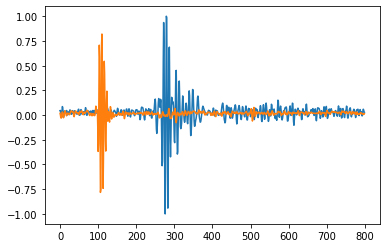

In [66]:
plt.plot(Doppler_beat)
plt.plot(generated_Doppler[Beat_n,:])


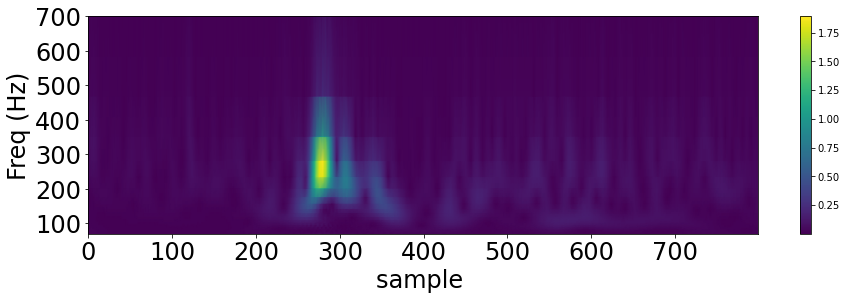

In [67]:
fs=2000
coeffs,f=create_scalogram(Doppler_beat,fs)
plt.subplots(figsize=[15,4])
plt.pcolormesh(np.arange(coeffs.shape[1]) , f,coeffs, shading='gouraud',cmap='viridis')
plt.xlabel("sample ", fontsize=24)
plt.ylabel("Freq (Hz)", fontsize=24)
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.colorbar()



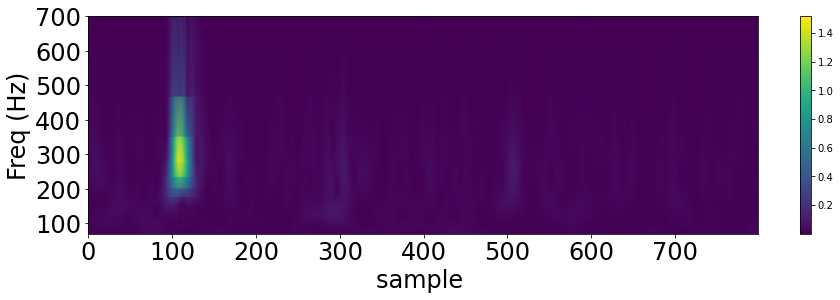

In [68]:
fs=2000
coeffs,f=create_scalogram(Gen_Doppler_beat,fs)
plt.subplots(figsize=[15,4])
plt.pcolormesh(np.arange(coeffs.shape[1]) , f,coeffs, shading='gouraud',cmap='viridis')
plt.xlabel("sample ", fontsize=24)
plt.ylabel("Freq (Hz)", fontsize=24)
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.colorbar()


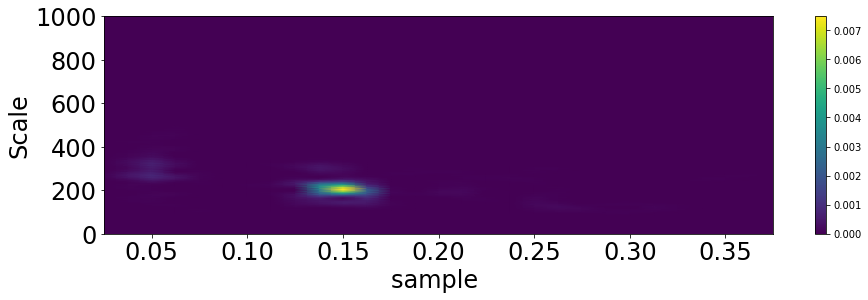

In [73]:
#Spectrogram
f, t, Sxx = signal.spectrogram(Doppler[100,:],nperseg=int(0.05*fs), window=signal.hann(int(0.05*fs)),nfft=256,fs=fs,noverlap=int(0.75*0.05*fs), return_onesided=True)
Sxx=abs(Sxx)
Sxx=Sxx.astype(float)
plt.subplots(figsize=[15,4])
plt.pcolormesh(t , f,Sxx, shading='gouraud',cmap='viridis')
plt.xlabel("sample ", fontsize=24)
plt.ylabel("Scale", fontsize=24)
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.colorbar()
